- file path: ~/KUBIG/KUBIG_2019_Summer/Python/data/ratings.csv

- file path: ~/KUBIG/KUBIG_2019_Summer/Python/data/movies.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- ratings.csv를 ratings라는 변수에 저장하시오.

In [4]:
ratings=pd.read_csv("~/KUBIG/KUBIG_2019_Summer/Python/data/ratings.csv")

- ratings의 head를 출력하시오.

In [5]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


- movies.csv를 movies라는 변수에 저장하시오.

In [6]:
movies=pd.read_csv("~/KUBIG/KUBIG_2019_Summer/Python/data/movies.csv")

- movies의 head를 확인하시오.

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


- movies와 ratings 두 dataframe의 공통으로 등장하는 movieId열을 기준으로 두 데이터 프레임을 병합하시오.

- 병합한 데이터 프레임을 movie_ratings라는 변수에 저장하시오.

In [11]:
movie_ratings=pd.merge(movies,ratings,on='movieId')

- movie_ratings의 head를 확인하시오.

In [13]:
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


- movie_ratings의 'timestamp'라는 열을 삭제하시오.

In [14]:
del movie_ratings['timestamp']

- movie_ratings의 남아있는 열들의 이름을 확인하시오.

In [15]:
print(movie_ratings.columns)

Index(['movieId', 'title', 'genres', 'userId', 'rating'], dtype='object')


- movie_ratings라는 dataframe에 value를 'rating', index를 'userId', columns를 'movieId'로 해서 pivot_table 메소드를 적용하시오.

- 그 결과를 movie_ratings_pivot이라는 변수에 저장하시오.

In [16]:
movie_ratings_pivot=movie_ratings.pivot_table(values='rating',index='userId',columns='movieId')

- movie_ratings_pivot의 head를 확인하시오.

In [18]:
movie_ratings_pivot.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- movie_ratings_pivot의 앞에서부터 100개의 열에 있는 결측치들을 ""으로 바꾸시오.

- 결측치를 제거한 데이터 프레임을 no_na라는 변수에 저장하시오.

In [19]:
no_na=movie_ratings_pivot.iloc[:,:100].fillna("")

- no_na의 head를 확인하시오.

In [23]:
no_na.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,102,103,104,105,106,107,108,110,111,112
userId,,,,,,,,,,,,,,,,,,,,,
1,4,,4,,,4,,,,,...,,,,,,,,4,,
2,,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,4,,,,,
5,4,,,,,,,,,,...,,,,,,,,4,,


- movie_ratings의 title열에 각각의 title들이 몇번 등장하는지를 value_counts 메소드를 이용해서 구하시오.

- value_counts 메소드에 head 메소드를 chain해서 앞에 5개의 행을 출력하시오.

In [24]:
print(movie_ratings.title.value_counts().head())

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64


- movie_ratings라는 변수에 groupby 메소드를 적용해서 'title'을 인덱스로 하시오.

- groupby 메소드에 agg 메소드를 chain해서 해당 'title'을 가진 영화가 몇번 'rating'되었는지, 'rating'의 평균은 어떻게 되는지를 구하시오.

In [25]:
movie_score=movie_ratings.groupby('title').agg({'rating':[np.size,np.mean]})

- movie_scroe에서 'size'가 15보다 큰 영화들의 경우에는 true를, 그렇지 않은 영화들의 경우에는 false의 값을 갖는 boolean series를 구하시오.

- 그 boolean series를 movie_size15라는 변수에 저장하시오.

In [26]:
movie_size15=movie_score['rating']['size']>15

- movie_size15를 활용해 movie_score라는 dataframe에서 rating이 15번 보다 많인 매겨진 영화들만 행으로 갖는 dataframe을 추출하시오.

- 추출한 dataframe에 sort_values 메소드를 적용해서 내림차순으로 정렬하고 movie_size15_df라는 변수에 저장하시오.

In [27]:
movie_size15_df=movie_score[movie_size15].sort_values([('rating','mean')],ascending=False)

- movie_size15_df의 head를 출력하시오.

In [28]:
print(movie_size15_df.head())

                                              rating          
                                                size      mean
title                                                         
Streetcar Named Desire, A (1951)                20.0  4.475000
Shawshank Redemption, The (1994)               317.0  4.429022
Hustler, The (1961)                             18.0  4.333333
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)   27.0  4.333333
Double Indemnity (1944)                         17.0  4.323529


- movie_size15_df에서 'size'의 분포를 histogram으로 나타내시오. 이때, bins은 15로 하시오.

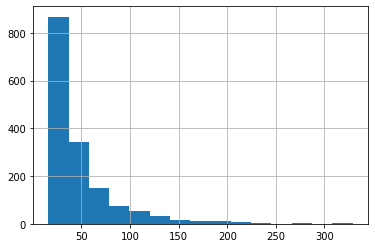

In [29]:
movie_size15_df['rating']['size'].hist(bins=15)

- movie_size15_df에서 'mean'의 분포를 histogram으로 나타내시오. 이때, bins은 15로 하시오.

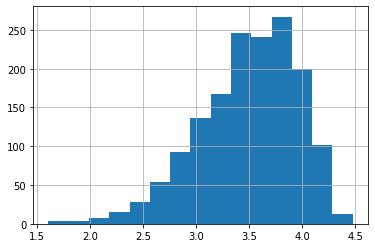

In [30]:
movie_size15_df['rating']['mean'].hist(bins=15)

- movie_ratings_pivot이라는 dataframe에서 jumanzi의 rating만을 iloc 메소드를 이용해 추출하시오.

- 추출된 jumanzi열을 jumanzi_rating에 저장하시오.

(jumanzi는 movie_ratings_pivot의 두번째 열에 등장합니다.)

In [31]:
jumanzi_rating=movie_ratings_pivot.iloc[:,1]

- movie_ratings_pivot에 corrwith 메소드를 이용해 jumanzi_rating과 다른 영화의 평점들과 상관계수를 구하시오.

- 그 상관계수의 series를 movies_like_jumanzi라는 변수에 저장하시오.

In [32]:
movies_like_jumanzi=movie_ratings_pivot.corrwith(jumanzi_rating)

c:\python\python37\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python\python37\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


- movies_like_jumanzi라는 pandas series를 dataframe으로 변환하여 corr_jumanzi라는 변수에 저장하시오.

- 이때, column의 이름은 'Correlation'으로 하시오.

In [33]:
corr_jumanzi=pd.DataFrame(movies_like_jumanzi,columns=['Correlation'])

- corr_jumanzi의 head를 출력하시오.

In [34]:
print(corr_jumanzi.head())

         Correlation
movieId             
1           0.330978
2           1.000000
3           0.419564
4                NaN
5           0.562791


- corr_jumanzi에서 결측값을 포함하고 있는 행들을 모두 삭제하시오.

In [35]:
corr_jumanzi.dropna(inplace=True)

- 맨 처음에 사용한 movies라는 dataframe에서 'movieId'와 'title' 두 열만을 추출하고 추출된 dataframe을 corr_jumanzi와 'movieId'를 기준으로 병합하시오.

- 병합한 dataframe을 corr_jumanzi_title이라는 변수에 저장하시오.

In [36]:
corr_jumanzi_title=pd.merge(movies[['movieId','title']],corr_jumanzi,on='movieId')

- corr_jumanzi_title의 앞에서부터 30개의 행을 출력하시오.

In [37]:
print(corr_jumanzi_title.head(30))

    movieId                                              title  Correlation
0         1                                   Toy Story (1995)     0.330978
1         2                                     Jumanji (1995)     1.000000
2         3                            Grumpier Old Men (1995)     0.419564
3         5                 Father of the Bride Part II (1995)     0.562791
4         6                                        Heat (1995)     0.163510
5         7                                     Sabrina (1995)     0.430261
6         8                                Tom and Huck (1995)     0.415227
7         9                                Sudden Death (1995)     0.277350
8        10                                   GoldenEye (1995)     0.016626
9        11                     American President, The (1995)     0.466415
10       12                 Dracula: Dead and Loving It (1995)     0.596943
11       13                                       Balto (1995)     0.542326
12       14 